In [1]:
%matplotlib inline
from pylab import *
import numpy as np
import random as rand

Blocking Probability:  0.0888194986556
Average arrival interval:  0.251847787817
Average served interval:  0.204338685353


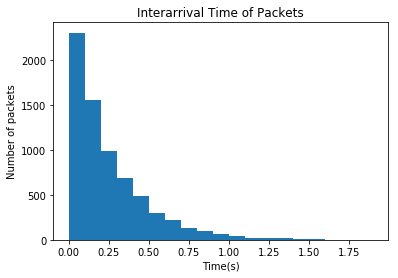

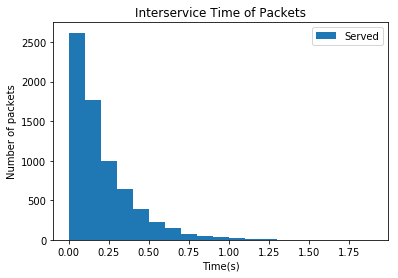

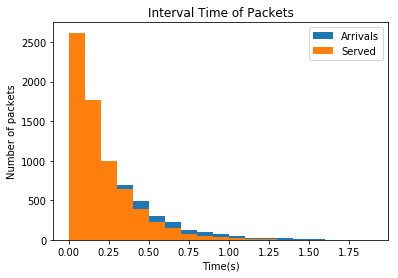

In [12]:
# k is number of packets able to be serviced
k = 5
# mu is the rate at which the server can process
mu = 5
# la is the rate of incoming packets
la = 4
# rho is a constant used in calculating M/M/1/k probabilities
rho = la/mu
# sample size of packets to test
samp = 7000

# calculates the blocking probability
pb = np.power(rho,k) * ((1-rho)/(1-np.power(rho, k+1)))
print("Blocking Probability: ", pb)

# provides a sample of interval times
# times are according to a Poisson Process
# a is interarrival times based on rate of arrival (la)
# s is interdeparture times based on rate of service (mu)
a = []
s = []
for i in range(0,samp):
    a.append(rand.expovariate(la))
    s.append(rand.expovariate(mu))
    
# plots a histogram to compare the two intervals
t = np.arange(0,2,0.1)
figure(1)
hist(a,t,label="Arrivals")
title("Interarrival Time of Packets")
ylabel("Number of packets")
xlabel("Time(s)")
figure(2)
hist(s,t,label="Served")
title("Interservice Time of Packets")
ylabel("Number of packets")
xlabel("Time(s)")
legend(loc="upper right")
figure(3)
hist(a,t,label="Arrivals")
hist(s,t,label="Served")
title("Interval Time of Packets")
ylabel("Number of packets")
xlabel("Time(s)")
legend(loc="upper right")

# shows the average interval times
print("Average arrival interval: ", average(a))
print("Average served interval: ", average(s))

show()

In [10]:
# set initial time
t = 0
# set empty buffer
buf = 0
# server is initially idle
idle = True
# i,j are indexes for arrival and service
# time intervals respectively
i = 0
j = 0
# drop counts packets dropped when buf is full
drop = 0
# sets the buffer size
maxbuf = 5

# loop over the entire sample space
while i < samp:
    # idle server state
    if idle:
        t += a[i]
        i += 1
        idle = False
        
    # active server state
    if not idle:
        # checks if the server has processed a packet
        if s[j] <= a[i]:
            t += s[j]
            a[i] -= s[j]
            # process next packet in buffer
            if buf > 0:
                buf -= 1
            # if nothing in buffer server is idle
            else:
                idle = True
            j += 1
            
        # checks if a packet has arrived before
        # the server has finished processing a packet
        if s[j] > a[i]:
            t += a[i]
            s[j] -= a[i]
            # if buffer is full then a packet is dropped
            if buf is maxbuf:
                drop += 1
            # packet to buffer
            else:
                buf += 1
            i += 1
            
print("Total packets sent in {0}sec: {1}".format(t,i))
print("Total packets dropped: ", drop)
print("Simulated blocking probability: ", drop/i)

Total packets sent in 1758.7370875429078sec: 7000
Total packets dropped:  481
Simulated blocking probability:  0.06871428571428571
